In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [3]:
wine = datasets.load_wine()

X = wine.data
y = wine.target

df = pd.DataFrame(data = X, columns = wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [10]:
min_max_values = df.describe().loc[['min', 'max']]
min_max_values

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
min,11.03,0.74,1.36,10.6,70.0,0.98,0.34,0.13,0.41,1.28,0.48,1.27,278.0
max,14.83,5.80,3.23,30.0,162.0,3.88,5.08,0.66,3.58,13.00,1.71,4.00,1680.0


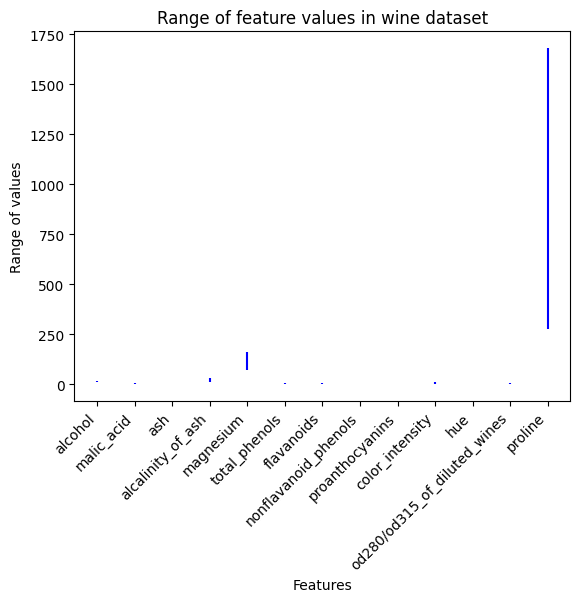

In [13]:
for feature in df.columns:
    plt.vlines(x = feature, ymin = min_max_values[feature]['min'], ymax = min_max_values[feature]['max'], color = 'blue')

plt.xticks(rotation = 45,ha = 'right')
plt.xlabel('Features')
plt.ylabel('Range of values')
plt.title('Range of feature values in wine dataset')
plt.show()

In [14]:
min_max_values['ash']['min']

1.36

In [15]:
scaler = StandardScaler()
X_standardised = scaler.fit_transform(X)
X_standardised

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [17]:
df_scaled = pd.DataFrame(data = X_standardised, columns = wine.feature_names)
df_scaled.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [18]:
min_max_values_scaled = df_scaled.describe().loc[['min', 'max']]
min_max_values_scaled

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
min,-2.434235,-1.432983,-3.679162,-2.671018,-2.088255,-2.107246,-1.695971,-1.868234,-2.069034,-1.634288,-2.094732,-1.895054,-1.493188
max,2.259772,3.109192,3.156325,3.154511,4.371372,2.539515,3.062832,2.402403,3.485073,3.435432,3.301694,1.960915,2.971473


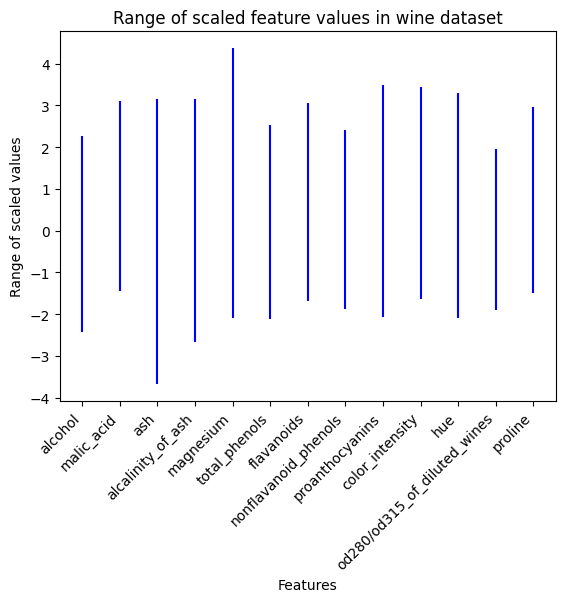

In [20]:
for feature in df_scaled.columns:
    plt.vlines(x = feature, ymin = min_max_values_scaled[feature]['min'], ymax = min_max_values_scaled[feature]['max'], color = 'blue')

plt.xticks(rotation = 45,ha = 'right')
plt.xlabel('Features')
plt.ylabel('Range of scaled values')
plt.title('Range of scaled feature values in wine dataset')
plt.show()